Let's get datablocks

This is the scheme!

```csv
# file_name	scenescore_1	score_2	score_3	score_4	score_5	score_6
```

In [1]:
from dataclasses import dataclass
import natsort
import pathlib
from typing import List
import cv2
from numpy.core.multiarray import ndarray
from scene import Screen, TitleScreen, MarioGameScreen, RadRacerGameScreen, TetrisGameScreen, ScoreScreen

In [2]:
samples_paths = pathlib.Path('samples').glob('*.png')
non_yt_sample_paths = [sample for sample in samples_paths if 'yt' not in str(sample)]

print(non_yt_sample_paths)

[WindowsPath('samples/snap_10142.png'), WindowsPath('samples/snap_10452.png'), WindowsPath('samples/snap_10683.png'), WindowsPath('samples/snap_1079.png'), WindowsPath('samples/snap_11118.png'), WindowsPath('samples/snap_120.png'), WindowsPath('samples/snap_12417.png'), WindowsPath('samples/snap_13042.png'), WindowsPath('samples/snap_14042.png'), WindowsPath('samples/snap_17935.png'), WindowsPath('samples/snap_19519.png'), WindowsPath('samples/snap_20038.png'), WindowsPath('samples/snap_2078.png'), WindowsPath('samples/snap_2387.png'), WindowsPath('samples/snap_24277.png'), WindowsPath('samples/snap_24356.png'), WindowsPath('samples/snap_24523.png'), WindowsPath('samples/snap_2576.png'), WindowsPath('samples/snap_2791.png'), WindowsPath('samples/snap_2969.png'), WindowsPath('samples/snap_3177.png'), WindowsPath('samples/snap_3267.png'), WindowsPath('samples/snap_3490.png'), WindowsPath('samples/snap_3558.png'), WindowsPath('samples/snap_3644.png'), WindowsPath('samples/snap_3898.png'),

In [31]:
screens: List[Screen] = [
    TitleScreen(),
    MarioGameScreen(),
    RadRacerGameScreen(),
    TetrisGameScreen(),
]

@dataclass
class TrainingCsvEntry:
    path: str
    scene_name: str
    score_0: str="n/a"
    score_1: str="n/a"
    score_2: str="n/a"
    score_3: str="n/a"
    score_4: str="n/a"
    score_5: str="n/a"

def process_path(path: pathlib.Path):

    hsv_image = cv2.imread(str(path))

    frame = cv2.resize(hsv_image, (256, 224))

    for screen in screens:
        hsv_image = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        if screen.match(hsv_image):
            if isinstance(screen, ScoreScreen):
                score = screen.score(hsv_image)
                score_list = list(f'{score:06}')
                return TrainingCsvEntry(
                    path=path,
                    scene_name = screen.__class__.__name__,
                    score_0=score_list[0],
                    score_1=score_list[1],
                    score_2=score_list[2],
                    score_3=score_list[3],
                    score_4=score_list[4],
                    score_5=score_list[5],
                )
    return TrainingCsvEntry(
        path=path,
        scene_name="n/a",
    )


csv_data = {sample_path: process_path(sample_path) for sample_path in natsort.os_sorted(non_yt_sample_paths)}

print(csv_data)

{Path('samples/snap_120.png'): TrainingCsvEntry(path=Path('samples/snap_120.png'), scene_name='n/a', score_0='n/a', score_1='n/a', score_2='n/a', score_3='n/a', score_4='n/a', score_5='n/a'), Path('samples/snap_459.png'): TrainingCsvEntry(path=Path('samples/snap_459.png'), scene_name='n/a', score_0='n/a', score_1='n/a', score_2='n/a', score_3='n/a', score_4='n/a', score_5='n/a'), Path('samples/snap_762.png'): TrainingCsvEntry(path=Path('samples/snap_762.png'), scene_name='MarioGameScreen', score_0='0', score_1='0', score_2='0', score_3='0', score_4='0', score_5='0'), Path('samples/snap_857.png'): TrainingCsvEntry(path=Path('samples/snap_857.png'), scene_name='MarioGameScreen', score_0='0', score_1='0', score_2='0', score_3='0', score_4='0', score_5='0'), Path('samples/snap_1079.png'): TrainingCsvEntry(path=Path('samples/snap_1079.png'), scene_name='MarioGameScreen', score_0='0', score_1='0', score_2='0', score_3='0', score_4='0', score_5='0'), Path('samples/snap_2078.png'): TrainingCsv

In [35]:
from fastai.data.all import *
from fastai.vision.all import *

number_values = [
    'n/a',
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
]

NumberCategoryBlock = CategoryBlock(vocab=number_values)

SceneCategoryBlock = CategoryBlock(vocab=[
    'n/a',
    'TitleScreen',
    'MarioGameScreen',
    'RadRacerGameScreen',
    'TetrisGameScreen',
])

def label_func(o):
    print(repr(o))
    return o



dblock = DataBlock(
    blocks=(
        ImageBlock,
        SceneCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
        NumberCategoryBlock,
    ),
    get_y=[
        lambda path: csv_data[path].scene_name,
        lambda path: csv_data[path].score_0,
        lambda path: csv_data[path].score_1,
        lambda path: csv_data[path].score_2,
        lambda path: csv_data[path].score_3,
        lambda path: csv_data[path].score_4,
        lambda path: csv_data[path].score_5,
    ],
    splitter=RandomSplitter(),
    # item_tfms = Resize(224)
    n_inp=1, )
print("setup!")


setup!


In [37]:
dblock.summary(csv_data.keys())
print("can this load the paths!")

Setting-up type transforms pipelines
Found 53 items
2 datasets of sizes 43,10
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['MarioGameScreen', 'RadRacerGameScreen', 'TetrisGameScreen', 'TitleScreen', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': True, 'add_na': False}
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'], 'sort': T

In [47]:
dsets = dblock.datasets(csv_data.keys())
dsets[0]
dsets.vocab

(#7) [['MarioGameScreen', 'RadRacerGameScreen', 'TetrisGameScreen', 'TitleScreen', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a'],['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n/a']]

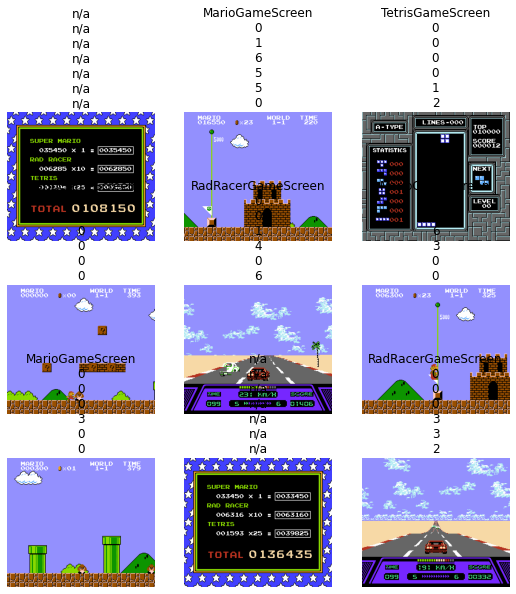

In [53]:
dls = dblock.dataloaders(csv_data.keys(), bs=10)
dls.show_batch()